<a href="https://colab.research.google.com/github/hollyplank/Essex-Group-2/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
#Data Analysis Libraries
import pandas as pd
import numpy as np

In [59]:
#Data Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#imports for machine learning
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [61]:
#Puts files from github into colab 
! git clone https://github.com/hollyplank/Essex-Group-2.git

fatal: destination path 'Essex-Group-2' already exists and is not an empty directory.


In [62]:
#Reading files from the github page  
train = pd.read_csv('Essex-Group-2/train.csv')
test = pd.read_csv('Essex-Group-2/test.csv')

In [63]:
#Printing to ensure that files have been correctly accessed 
print(train)
print(test)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
     PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            89

In [64]:
#Printing To See What Column Variables Exist &  What data type they are
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [65]:
# This generates a table containing the number of missing entries of each catogrie in the data
def nulldata(df):
  nulls = df.isnull().sum().sort_values(ascending = False)
  total = round(((nulls - nulls) + len(df)), 2)
  return pd.concat([nulls, total], axis = 1, keys = ['No. Values Missing', 'Out Of'])

In [66]:
# This shows to the user a table giving the total number of missing values for each category
nulldata(train)

,No. Values Missing,Out Of
Cabin,687,891
Age,177,891
Embarked,2,891
Fare,0,891
Ticket,0,891
Parch,0,891
SibSp,0,891
Sex,0,891
Name,0,891
Pclass,0,891


In [67]:
# This shows to the user a table giving the total number of missing values for each category
nulldata(test)

,No. Values Missing,Out Of
Cabin,327,418
Age,86,418
Fare,1,418
Embarked,0,418
Ticket,0,418
Parch,0,418
SibSp,0,418
Sex,0,418
Name,0,418
Pclass,0,418


Using both tables to check for nulls we could see and accuratly assess what needed to be changed or added into the set to give the model more data to use and potentially also what data we should abandon due to so much missing information. 

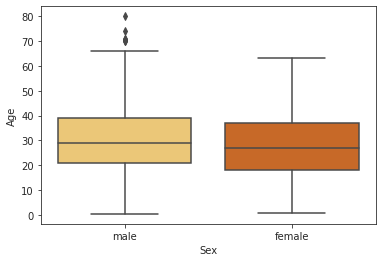

In [68]:
#This creates a box plot which give average ages to each sex so for men it is roughly just before their 30's and for women it is around their mid 20's
sns.set_style("ticks")
sns.boxplot(x = 'Sex', y = 'Age', palette="YlOrBr", data=train)

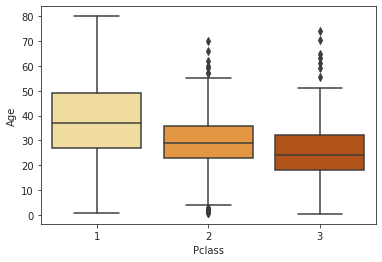

In [69]:
#This creates a box plot showing the average ages for peoples class 
sns.boxplot(x = 'Pclass', y = 'Age', palette="YlOrBr", data=train)

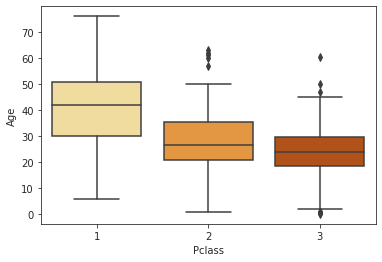

In [70]:
#This creates a box plot showing the average ages for peoples class but this time in the test data so it can be used and compared later to fill in the gaps for Age. 
sns.boxplot(x = 'Pclass', y = 'Age', palette="YlOrBr", data=test)

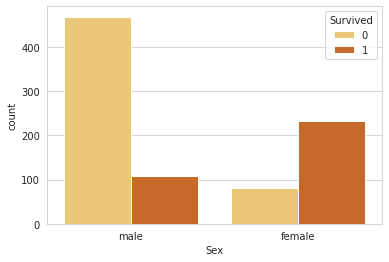

In [71]:
#This shows number of men and women who did or did not survive which actually shows us you were a lot more likely to die if you were male 
sns.set_style('whitegrid')
sns.countplot(x = 'Sex', hue = 'Survived', palette="YlOrBr", data = train)

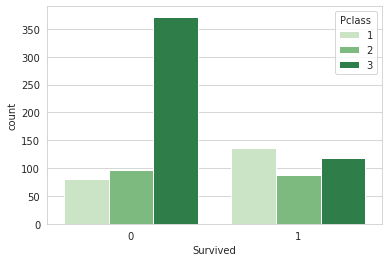

In [72]:
#This shows based on peoples class if they survived or not.
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = "Pclass", palette="Greens", data = train)

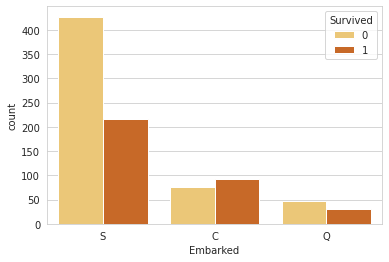

In [73]:
#This creates a graph showing how many people from each port survived, so from this we can tell that people from the S labelled port were much more likely to survive the titanic
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked', hue = "Survived", palette="YlOrBr", data = train)

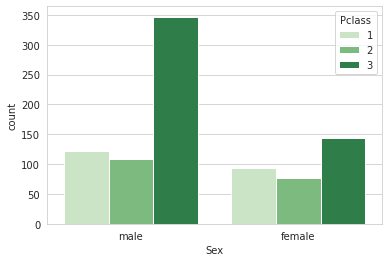

In [74]:
#This shows how many men and women belonged to each class. 
sns.set_style('whitegrid')
sns.countplot(x = 'Sex', hue = "Pclass",palette="Greens", data = train)

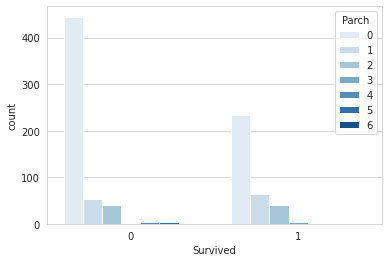

In [75]:
#This shows a chart that displays the number of people who survived and how many parents or children they had
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = "Parch",palette="Blues", data = train)

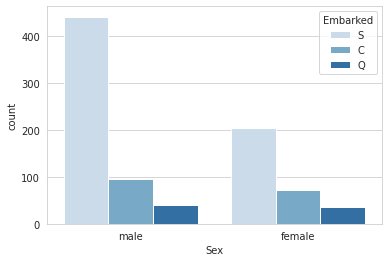

In [76]:
#This chart shows the distribution of men and women departing from different locations
sns.set_style('whitegrid')
sns.countplot(x = 'Sex', hue = "Embarked",palette="Blues", data = train)

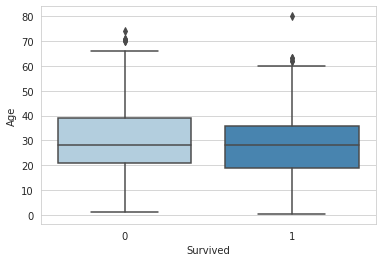

In [78]:
#This shows the average age of survivors 
sns.boxplot(x = 'Survived', y = 'Age', palette="Blues", data=train)

In [ ]:
#This creates a function that uses previous data found in graphs and takes that and assigns people with missing ages the average age of their given class. 
def AvgAge_train(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age): 
    if Pclass == 1:
      return 38
    elif Pclass == 2:
        return 29
    else:
          return 25
  else:
        return Age

In [ ]:
#This does the same as above however uses the test data to be more accurate for this fucntions purpose  
def AvgAge_test(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age): 
    if Pclass == 1:
      return 39
    elif Pclass == 2:
        return 27
    else:
          return 22
  else:
        return Age

In [ ]:
#This is setting the age feature to be equivalent to the function results of the function AvgAge_train
train['Age'] = train[['Age', 'Pclass']].apply(AvgAge_train, axis = 1)

In [ ]:
#This creates new features from embarked and sex which allow them to be broken down into individual ports and genders as to make the data of a usable type for the model 
sex_train = pd.get_dummies(train['Sex'], sparse = False)
embarked_train = pd.get_dummies(train['Embarked'], sparse = False)

In [ ]:
#This is adding the above created features to the train data set
train = pd.concat([train, sex_train, embarked_train], axis = 1)

In [ ]:
#This is setting the age feature to be equivalent to the function results of the function AvgAge_test
test['Age'] = test[['Age', 'Pclass']].apply(AvgAge_test, axis = 1)

In [ ]:
#This fills in the very few missing values from test and trains features embarked and fare and simply replaces it with the median value as there is literally only 1 or 2 of these values missin
test['Fare'].fillna(test['Fare'].median(), inplace = True)
train['Embarked'].fillna(train['Fare'].median(), inplace = True)

In [ ]:
#This is again generating more features but this time for test and then dropping the original columns out. 
sex_test = pd.get_dummies(test['Sex'], sparse = False)
test.drop('Sex', axis = 1, inplace = True)

In [ ]:
#This is again generating more features but this time for test and then dropping the original columns out. 
embarked_test = pd.get_dummies(test['Embarked'], sparse = False)
test.drop('Embarked', axis = 1, inplace = True)

In [ ]:
#This is adding the above created features to the test data set
test = pd.concat([test, sex_test, embarked_test], axis = 1)

In [ ]:
#Removing the columns from the data set 
train.drop('Cabin', axis = 1, inplace = True)
train.drop('Name', axis = 1, inplace = True)
train.drop('Ticket', axis = 1, inplace = True)
train.drop('Embarked', axis = 1, inplace = True)
train.drop('Sex', axis = 1, inplace = True)

In [ ]:
#Removing the columns from the data set 
test.drop('Cabin', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [ ]:
#Checking to see if the features are now the same and that
nulldata(train)
nulldata(test)

In [ ]:
#This is setting up variables for the machine learning part
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test

In [ ]:
#This is calling the model from sklearn and running our data through it and calculates the accruacy (the accuracy percentage as no hyper parameter tuning takes place so it's overcompensating)
rForest = RandomForestClassifier()
rForest.fit(X_train, y_train)
rForestY_Predict = rForest.predict(X_test)
rForestAcc = rForest.score(X_train, y_train)
print('Accuracy with the Random Forest model is: ', round(rForestAcc, 2))

In [ ]:
#This is sets the values gained from the machine learning to be stored in the gender submission csv file to then be downloaded 
gender_submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived': rForestY_Predict})
gender_submission.to_csv('Essex-Group-2/gender_submission.csv', index = False)